In [14]:
import cv2

In [15]:
from src.imageoverlay.classification_decorator import ClassificationDecorator as ClassDecorator
from src.imageoverlay.framecomponent import CachingLandmarkComponent as LandmarkComponent
from src.imageoverlay.multifacesloopdecorator import MultiFacesLoopDecorator as AllFaces
from src.imageoverlay.framecomponent import LandmarkOverlayDecorator
from src.machinelearningsuite.landmarkdetector import LandmarkDetector
from src.machinelearningsuite.predictorinterface import PredictorInterface
from src.imageoverlay.configured_overlay_decorator import ConfiguredOverlayDecorator as SpriteDecorator

## Method to display streams in notebook 

In [16]:
import IPython
import PIL.Image
from io import StringIO
from io import BytesIO
from IPython.display import clear_output
import cv2
from time import sleep

In [17]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, fmt='jpeg'):
    f = BytesIO()
    something = PIL.Image.fromarray(a)
    something.save(f, fmt)
    clear_output(wait=True)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

## Video parameters

In [18]:
scale = 0.6

In [19]:
def construct_stream():
    # return cv2.VideoCapture("../videos/obama.mp4")
    return cv2.VideoCapture(0)

## Main loop method

In [20]:
def run_pipeline_with_end_component(component):
    try:
        video_stream = construct_stream()
        while True:
            _, skipped_frame = video_stream.read()
            ret, frame = video_stream.read()
            if frame is None:
                continue
            frame = cv2.resize(frame, (0, 0), fx=scale, fy=scale)
            base_component.set_image(frame)
            output = component.get_image()
            output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
            showarray(output)
    except KeyboardInterrupt:
        video_stream.release()
        print("Stream stopped")
    video_stream.release()

## Decorator pipeline

In [21]:
# Instanciate a new landmark detector
detector_data_path = '../data/shape_predictor_68_face_landmarks.dat'
landmark_detector = LandmarkDetector(predictor_file=detector_data_path)

# Create a frame component with landmarks
base_component = LandmarkComponent(landmark_detector)

In [22]:
landmarks = LandmarkOverlayDecorator(base_component)

In [23]:
# Instantiate and initialize the trained predictor
predictor = PredictorInterface('./examples/mouth.pkl')
predictor.initialize()

Current configuration:
-----------------------
{'classes': ['open mouth', 'closed mouth'], 'normalizer': Normalizer(copy=True, norm='l2'), 'classifier': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'feature-processor': FeatureProcessing(parts=['mouth']), 'data-labels': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'data-values': [[-25, -24, -14, -30, -3, -32, 3, -30, 9, -31, 16, -27, 19, -19, 14, -6, 7, 0, 0, 0, -7, -1, -17, -7, -21, -23, -4, -26, 3, -25, 8, -26, 16, -19, 7, -10, 1, -9, -6, -10], [-26, -24, -15, -31, -3, -33, 3, -31, 9, -32, 16, -29, 19, -19, 14, -7, 7, -1, 0, 0, -7, -1, -17, -8, -21, -23, -4, -27, 2, -26, 8, -27, 15, -20, 7, -11, 1, -10, -6, -11], [-26, -25, -15, -32, -3, -34, 3, 

In [24]:
# Add decorator for the predictor
predictor_decorator = ClassDecorator(parent_component=landmarks, classifier=predictor)
hat = SpriteDecorator(base_file_name='./sprites/Party_Hat')
predictor_decorator.set_decorator_for_class(hat, 0)

In [25]:
multifaces = AllFaces.wrap(predictor_decorator)

Current configuration:
-----------------------
{'classes': ['open mouth', 'closed mouth'], 'normalizer': Normalizer(copy=True, norm='l2'), 'classifier': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'feature-processor': FeatureProcessing(parts=['mouth']), 'data-labels': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'data-values': [[-25, -24, -14, -30, -3, -32, 3, -30, 9, -31, 16, -27, 19, -19, 14, -6, 7, 0, 0, 0, -7, -1, -17, -7, -21, -23, -4, -26, 3, -25, 8, -26, 16, -19, 7, -10, 1, -9, -6, -10], [-26, -24, -15, -31, -3, -33, 3, -31, 9, -32, 16, -29, 19, -19, 14, -7, 7, -1, 0, 0, -7, -1, -17, -8, -21, -23, -4, -27, 2, -26, 8, -27, 15, -20, 7, -11, 1, -10, -6, -11], [-26, -25, -15, -32, -3, -34, 3, 

## Run

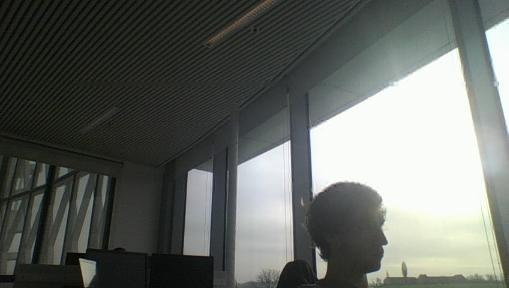

Stream stopped


In [26]:
run_pipeline_with_end_component(multifaces)